## Connors RSI


An old strategy had the premise to buy when the RSI goes below a certain value<br>
an then back above, after the event you buy and hold for a day<br>
Here is the testing on that strategy, to see how it does<br>

**_Details about the sources_**:
#### Strategy:  https://school.stockcharts.com/doku.php?id=trading_strategies:rsi2
#### Data:  www.stooq.com

COMMENTS: IMPORT THE DATA AND TEST

In [1]:
# The code was removed by Watson Studio for sharing.

,Date,Open,High,Low,Close,Volume
0,1970-01-02,92.06,93.54,91.79,93.00,8944444.0
1,1970-01-05,93.00,94.25,92.53,93.46,12766667.0
2,1970-01-06,93.46,93.81,92.13,92.82,12733333.0
3,1970-01-07,92.82,93.38,91.93,92.63,11122222.0
4,1970-01-08,92.63,93.47,91.99,92.68,11855556.0


In [2]:
import pandas as pd 
import numpy as np 
import random 

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
%matplotlib inline 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

!conda install -c conda-forge pydotplus --yes 

Solving environment: done

# All requested packages already installed.



In [ ]:
df_data_0.Close.plot()

In [5]:
global df
df = df_data_0[['Date','Open','Close']]
df.head()

,Date,Open,Close
0,1970-01-02,92.06,93.00
1,1970-01-05,93.00,93.46
2,1970-01-06,93.46,92.82
3,1970-01-07,92.82,92.63
4,1970-01-08,92.63,92.68


COMMENTS: DATA IMPORTED SUCCESSFULLY AND TRANSFORMED (Removed High,Lows)<br>
NEXT ADD INDICATORS (RSI, SMA, etc)

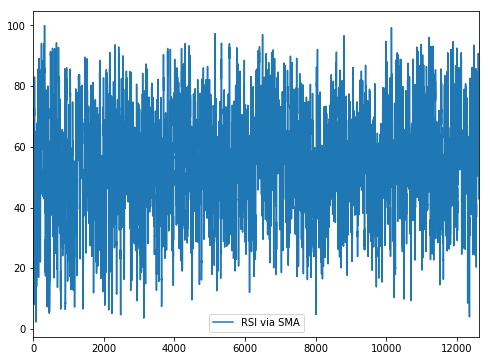

In [6]:
#import datetime
#import matplotlib.pyplot as plt
#
## Dates
#start = '2010-01-01'
#end = '2013-01-27'
#
## Get data
#data = web.DataReader('AAPL', 'yahoo', start, end)

# Window length for moving average
window_length = 14

# Get just the adjusted close
# Get the difference in price from previous step
delta = df['Close'].diff()
# Get rid of the first row, which is NaN since it did not have a previous 
# row to calculate the differences
delta = delta[1:] 

# Make the positive gains (up) and negative gains (down) Series
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0

# Calculate the SMA
roll_up2 = up.rolling(window_length).mean()
roll_down2 = down.abs().rolling(window_length).mean()

# Calculate the RSI based on SMA
RS2 = roll_up2 / roll_down2
RSI2 = 100.0 - (100.0 / (1.0 + RS2))


# Compare graphically
plt.figure(figsize=(8, 6))
RSI2.plot()
plt.legend(['RSI via SMA'])
plt.show()

In [7]:
#Add RSI to Days
df = pd.concat([df, pd.DataFrame(RSI2)], axis=1)
df.columns = ['Date', 'Open','Close','RSI']

### Add other fields: RSI Group, SMA200, SMA50, isUpDay

In [8]:
df['dayMove'] = df['Close'] - df['Open']
df['nxtDay'] = df.dayMove.shift(-1)
df['RSI_pre1'] = df.RSI.shift(+1)
df['rsibin'] = ((df.RSI / 10).round())*10

df['sma200'] = df.Close.rolling(200).mean()
df['sma50'] = df.Close.rolling(50).mean()
df['Upday'] = np.where(df['Close'] > df['Open'], 1, 0)
df['Uptmr'] = df.Upday.shift(-1)

df = df.dropna()

In [9]:
df.head(20)

,Date,Open,Close,RSI,dayMove,nxtDay,RSI_pre1,rsibin,sma200,sma50,Upday,Uptmr
199,1970-10-14,84.06,84.19,65.259349,0.13,0.46,62.782402,70.0,82.25585,81.3052,1,1.0
200,1970-10-15,84.19,84.65,62.005277,0.46,-0.37,65.259349,60.0,82.21410,81.4546,1,0.0
201,1970-10-16,84.65,84.28,52.692868,-0.37,-1.13,62.005277,50.0,82.16820,81.5986,0,0.0
202,1970-10-19,84.28,83.15,45.534591,-1.13,0.49,52.692868,50.0,82.11985,81.7160,0,1.0
203,1970-10-20,83.15,83.64,45.875000,0.49,0.02,45.534591,50.0,82.07490,81.8648,1,1.0
204,1970-10-21,83.64,83.66,45.875000,0.02,-0.28,45.875000,50.0,82.02980,82.0216,1,0.0
205,1970-10-22,83.66,83.38,38.037634,-0.28,0.39,45.875000,40.0,81.98470,82.1808,0,1.0
206,1970-10-23,83.38,83.77,29.294479,0.39,-0.46,38.037634,30.0,81.94505,82.3610,1,0.0
207,1970-10-26,83.77,83.31,23.181818,-0.46,-0.19,29.294479,20.0,81.90200,82.5236,0,0.0
208,1970-10-27,83.31,83.12,22.074074,-0.19,0.31,23.181818,20.0,81.85935,82.6794,0,1.0


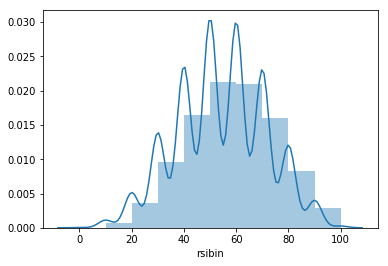

In [10]:
#Frequency of each bin
sns.distplot(df['rsibin'],bins=10)

### Function where RSI crosses above then go long
### E.g. RSI previous = 8, RSI current = 11  --> RSI crossed over 10 then go long

In [11]:
def getRSIBuys(rval):
    df['mustLong'] = np.where(np.logical_and(df['RSI_pre1']<rval,df['RSI']>=rval), 1, 0)
    df.head()
    aframe = df[df.mustLong == 1].copy()
    return aframe


In [12]:
dfProf = getRSIBuys(10)
dfProf.reset_index(drop=False, inplace=True)
dfProf.head()

,index,Date,Open,Close,RSI,dayMove,nxtDay,RSI_pre1,rsibin,sma200,sma50,Upday,Uptmr,mustLong
0,400,1971-08-02,95.58,95.96,15.961538,0.38,-1.45,7.328990,20.0,95.77560,99.3264,1,0.0,1
1,463,1971-10-29,93.96,94.23,12.158055,0.27,-1.43,8.204334,10.0,99.10325,98.5630,1,0.0,1
2,465,1971-11-02,92.80,93.18,10.947931,0.38,1.64,5.751634,10.0,99.09730,98.3310,1,1.0,1
3,785,1973-02-09,113.16,114.68,24.375000,1.52,1.37,6.564885,20.0,111.44090,117.3652,1,1.0,1
4,920,1973-08-23,100.62,101.91,23.310023,1.29,-0.29,8.401084,20.0,110.95730,104.7850,1,0.0,1


**COMMENTS: To See how many occurrences have happened since the data started in 1971**

In [13]:
df['mustLong'].sum()

21

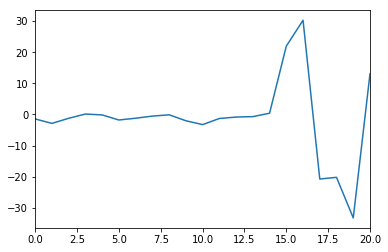

In [14]:
dfProf['cumSum'] = dfProf.nxtDay.cumsum()               
dfProf.cumSum.plot()

**Oh no! There's only 21 times this happened since 1971** <br>
**And the results dont particularly look good either**

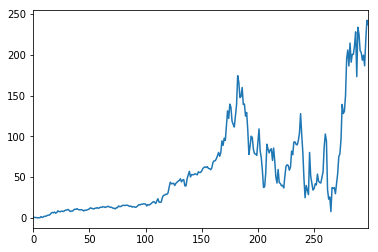

In [15]:
## Trying things out with manual testing - already looks better
dfProf = getRSIBuys(30)
dfProf.reset_index(drop=False, inplace=True)
dfProf['cumSum'] = dfProf.nxtDay.cumsum()               
dfProf.cumSum.plot()

**Lets test for every possibility (crosses at 10,20,30,...)**

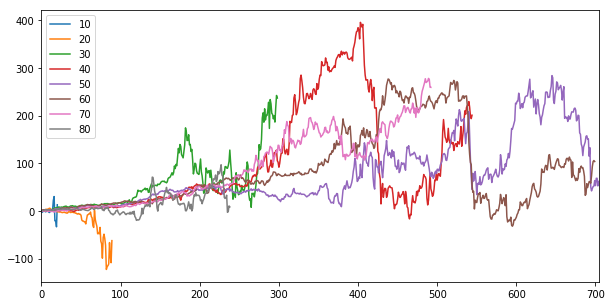

In [16]:
for x in range(10, 90, 10):
    dfProf = getRSIBuys(x)
    dfProf.reset_index(drop=False, inplace=True)
    dfProf['cumSum'] = dfProf.nxtDay.cumsum()               
    dfProf.cumSum.plot(figsize=(10,5),label=x).legend(loc="upper left")
    

In [18]:
for x in range(10, 100, 10):
    dfProf = getRSIBuys(x)
    dfProf.reset_index(drop=False, inplace=True)
    dfProf['cumSum'] = dfProf.nxtDay.cumsum()
    print("X["+str(x)+"] CumSum=["+str(dfProf[-1:].cumSum.sum().round())+"]")


X[10] CumSum=[13.0]
X[20] CumSum=[-62.0]
X[30] CumSum=[237.0]
X[40] CumSum=[201.0]
X[50] CumSum=[54.0]
X[60] CumSum=[104.0]
X[70] CumSum=[260.0]
X[80] CumSum=[8.0]
X[90] CumSum=[-67.0]


## What the results show is that at<br>
#1 RSI should be 70 (260)<br>
#2 RSI should be 30 (237)<br>
#3 RSI should be 40 (201)<br>
<br>
The RSI @ 30 is very interesting because this is the value that is recommended as the default settings<br>
on most trading platforms. However the author of the original system recommended 10.<br>
The difference in results can be attributed to the fact that no exit strategy was given<br>
and holding it for 1 day was used to really test validity of the idea.<br>

**Conclusion:**<br>
The system's definitely seems interesting and show potential<br>
I would definitely recommend further investigation into this.<br>